In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

/home/davi/anaconda3/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (0,1,18) have mixed types.Specify dtype option on import or set low_memory=False.



iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
32782      NaN       NaN  International 2020-02-28        705.0        0.0   
32783      NaN       NaN  International 2020-02-29        705.0        0.0   
32784      NaN       NaN  International 2020-03-01        705.0        0.0   
32785      NaN       NaN  International 2020-03-02        705.0        0.0   
32786      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
32782           4.0         0.0                      NaN   
32783           6.0         2.0                      NaN   
32784           6.0         0.0                      NaN   
32785           6.0         0.0                      NaN   
32786           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                        0.0  ...          1.337        1803.987   
1                        0.0  ...          1.337        1803.987   
2                        0.0  ...          1.337        1803.987   
3                        0.0  ...          1.337        1803.987   
4                        0.0  ...          1.337        1803.987   
...                      ...  ...            ...             ...   
32782                    NaN  ...            NaN             NaN   
32783                    NaN  ...            NaN             NaN   
32784                    NaN  ...            NaN             NaN   
32785                    NaN  ...            NaN             NaN   
32786                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                597.029                 9.59   
1                  NaN                597.029                 9.59   
2                  NaN                597.029                 9.59   
3                  NaN                597.029                 9.59   
4                  NaN                597.029                 9.59   
...                ...                    ...                  ...   
32782              NaN                    NaN                  NaN   
32783              NaN                    NaN                  NaN   
32784              NaN                    NaN                  NaN   
32785              NaN                    NaN                  NaN   
32786              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                  37.746   
1                 NaN           NaN                  37.746   
2                 NaN           NaN                  37.746   
3                 NaN           NaN                  37.746   
4                 NaN           NaN                  37.746   
...               ...           ...                     ...   
32782             NaN           NaN                     NaN   
32783             NaN           NaN                     NaN   
32784             NaN           NaN                     NaN   
32785             NaN           NaN                     NaN 

### Start date to analysis: 2020-03-01

In [5]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[(df['date'] > '2020-03-01')]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
20603 2020-03-17               Myanmar          0.0           0.0        0.0   
62    2020-03-02           Afghanistan          1.0           0.0        0.0   
28178 2020-03-15             Swaziland          1.0           0.0        1.0   
10890 2020-03-15                 Gabon          1.0           0.0        0.0   
10891 2020-03-16                 Gabon          1.0           0.0        0.0   
...          ...                   ...          ...           ...        ...   
30636 2020-03-14  United Arab Emirates          NaN           NaN        NaN   
31910 2020-03-03               Vietnam          NaN           NaN        NaN   
31911 2020-03-04               Vietnam          NaN           NaN        NaN   
31912 2020-03-05               Vietnam          NaN           NaN        NaN   
31913 2020-03-06               Vietnam          NaN           NaN        NaN   

       new_deaths  
20603         0.0  
62            0.0  
28178         0.0  
10890         0.0  
10891         0.0  
...           ...  
30636         NaN  
31910         NaN  
31911         NaN  
31912         NaN  
31913         NaN  

[28436 rows x 6 columns]

# 1. Number of cases and deaths in World

In [6]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02      89136.0        3046.0     2094.0        67.0
1   2020-03-03      90972.0        3118.0     1836.0        72.0
2   2020-03-04      93252.0        3202.0     2280.0        84.0
3   2020-03-05      95567.0        3282.0     2315.0        80.0
4   2020-03-06      98600.0        3384.0     3033.0       102.0
..         ...          ...           ...        ...         ...
142 2020-07-22   14922665.0      616324.0   239463.0      6220.0
143 2020-07-23   15204874.0      623290.0   282209.0      6966.0
144 2020-07-24   15480762.0      633126.0   275888.0      9836.0
145 2020-07-25   15762581.0      639275.0   281819.0      6149.0
146 2020-07-26   16018105.0      644832.0   255524.0      5557.0

[147 rows x 5 columns]

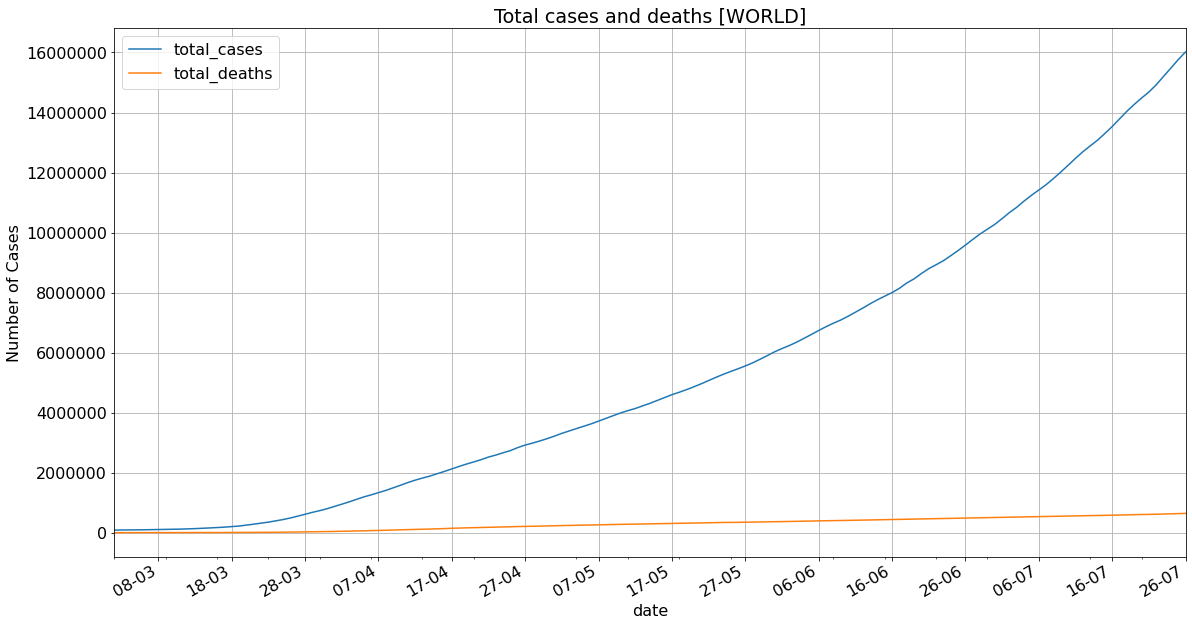

In [7]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases and deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [8]:
figWorld = go.Figure()

figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_cases, name='Total Cases'))
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_deaths, name='Total Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left",
                                   x=0.01, traceorder='reversed', font_size=16),
                                   xaxis_tickformat = '%d-%m',
                                   title='Total Cases and Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)

figWorld.show()

### New deaths per day

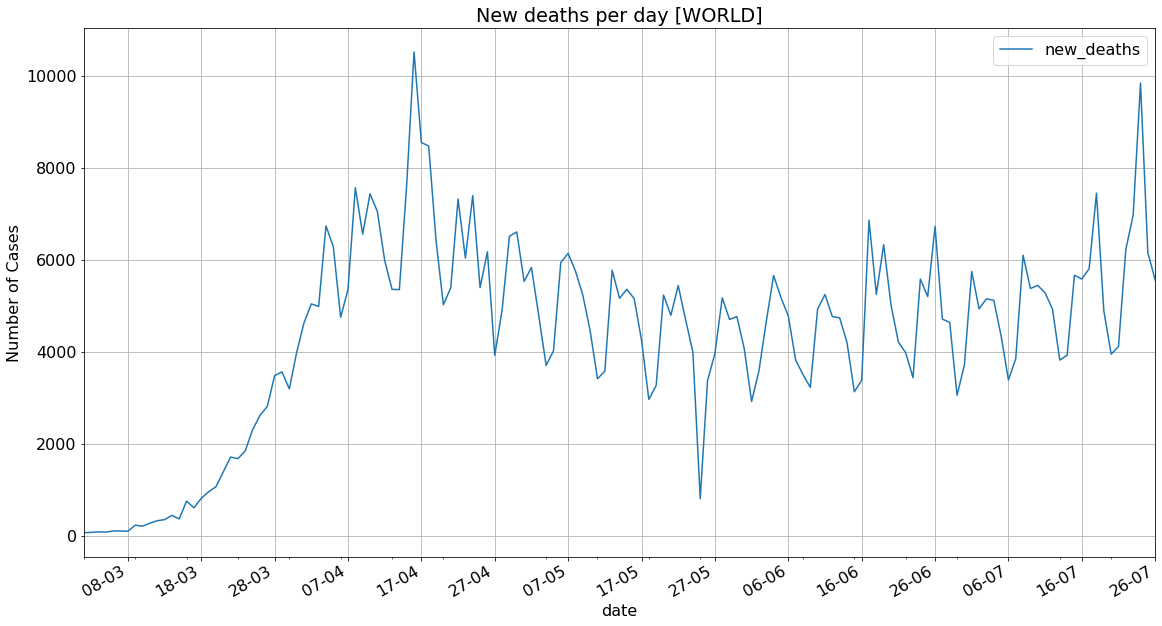

In [9]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [10]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='New Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%d-%m',
                       title='New Deaths per day [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### New cases per day

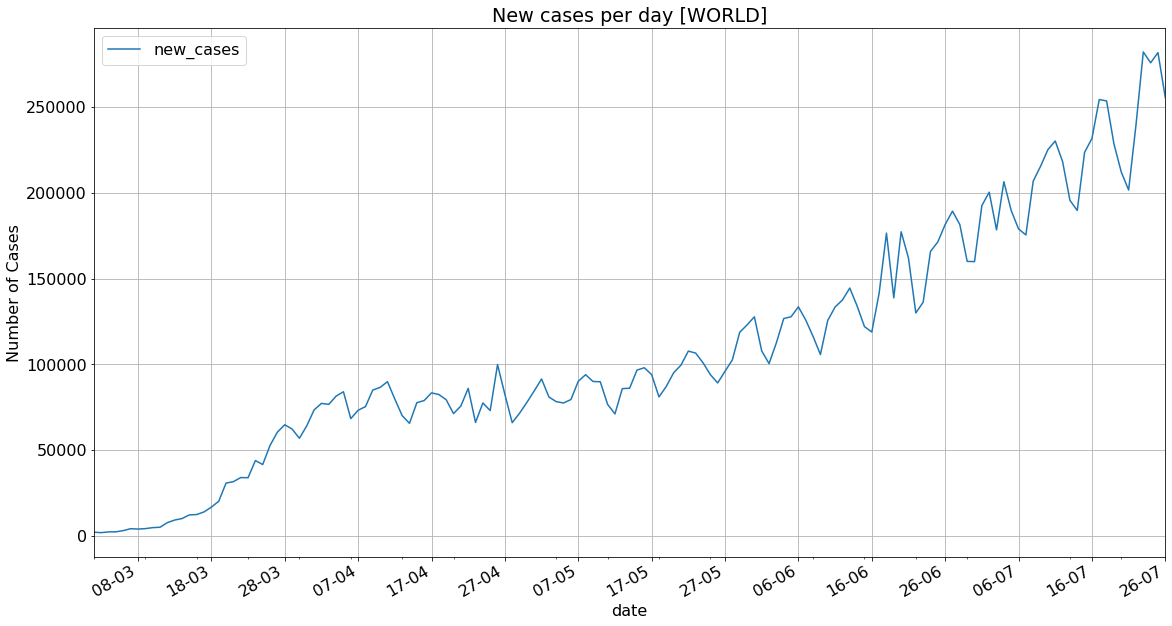

In [11]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [12]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_cases, name='New Cases'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%d-%m',
                       title='New Cases per day [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [13]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date       location  total_cases  total_deaths  new_cases  \
31188 2020-07-26  United_States    4178027.0      146460.0    65498.0   
31187 2020-07-25  United_States    4112529.0      145546.0    78427.0   
31186 2020-07-24  United_States    4034102.0      144242.0    63196.0   
31185 2020-07-23  United_States    3970906.0      143190.0    68848.0   
31184 2020-07-22  United_States    3902058.0      142066.0    72048.0   
...          ...            ...          ...           ...        ...   
15299 2020-07-21          Italy     244624.0       35058.0      190.0   
15298 2020-07-20          Italy     244434.0       35045.0      218.0   
15297 2020-07-19          Italy     244216.0       35042.0      249.0   
15296 2020-07-18          Italy     243967.0       35028.0      231.0   
15295 2020-07-17          Italy     243736.0       35017.0      230.0   

       new_deaths  
31188       914.0  
31187      1304.0  
31186      1052.0  
31185      1124.0  
31184      1160.0  
...           ...  
15299        13.0  
15298         3.0  
15297        14.0  
15296        11.0  
15295        20.0  

[243 rows x 6 columns]

In [14]:
myDate = df['date'].astype(str).unique()

In [15]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'Mexico', 'United_Kingdom', 'Italy'],
      dtype=object)

In [16]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [17]:
newDf_list=[]
for index in range(len(dfCountry)):  
    newDf = [d[index]['new_deaths']]
    header = [dfCountry[index]]
    newDf = pd.concat(newDf, axis=1, keys=header)
    newDf_list.append(newDf)

## New deaths per day in the main countries

In [18]:
dfConcat = []
for index in range(len(dfCountry)):
    dfConcat = pd.concat(newDf_list, axis=1)
dfConcat.insert(0, 'date', myDate)
dfConcat.sort_values(by=['date'], ascending=False)

date  United_States  Brazil  Mexico  United_Kingdom  Italy
130  2020-07-26          982.0  1220.0   736.0           233.0   12.0
131  2020-07-25          806.0  1214.0   578.0            61.0   12.0
132  2020-07-24          717.0  1071.0   296.0           184.0    7.0
133  2020-07-23          391.0   631.0   301.0           135.0    9.0
134  2020-07-22          400.0   733.0   915.0           173.0   13.0
..          ...            ...     ...     ...             ...    ...
54   2020-03-06         1054.0   357.0    89.0          1005.0  420.0
58   2020-03-05         2110.0   474.0   197.0           909.0  382.0
14   2020-03-04           12.0     0.0     2.0            15.0  370.0
23   2020-03-03          211.0    12.0     8.0           149.0  743.0
1    2020-03-02            4.0     0.0     0.0             0.0   17.0

[147 rows x 6 columns]

In [19]:
toGo = dfConcat.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

### Obs.: zoom enabled

In [20]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='New deaths per day in the main countries')

figTest.show()

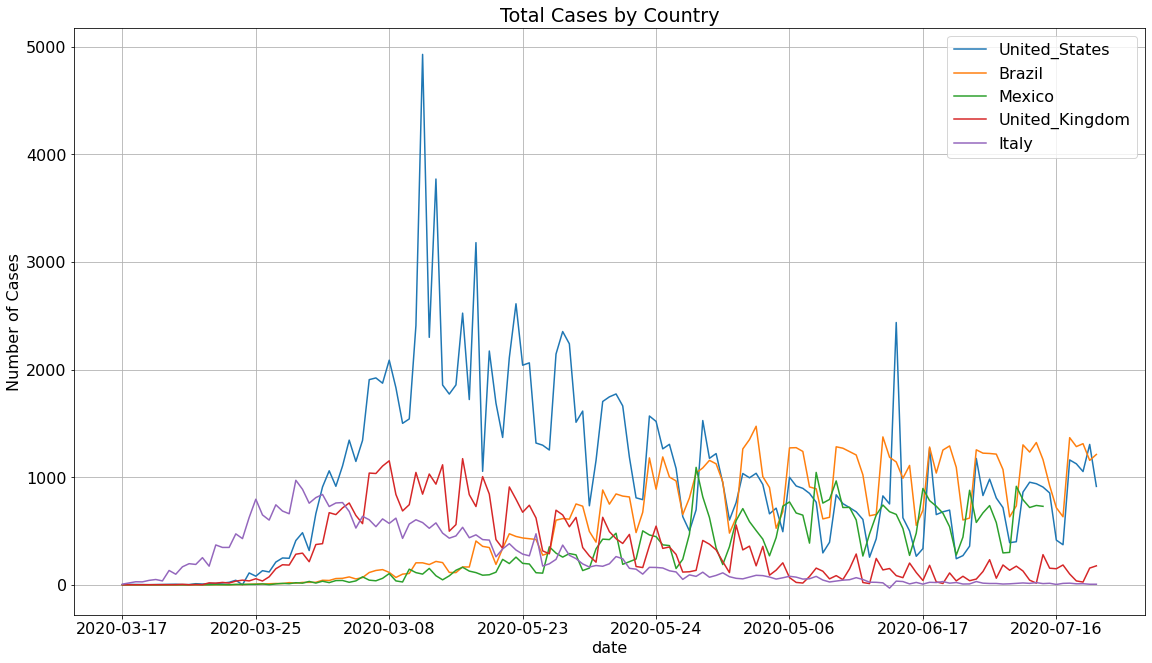

In [21]:
dfConcat.plot(x='date', y=dfCountry, figsize=(19.20,10.80))
plt.title('Total Cases by Country')
plt.ylabel('Number of Cases')
plt.grid()

### New deaths per day by country

In [22]:
fig = go.Figure()
for index in range(len(dfCountry)):
    fig = go.Figure(data=go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))
    fig.update_traces(mode="markers+lines")
    fig.update_layout(xaxis_tickformat = '%d-%m', title=dfCountry[index])
    fig.update_xaxes(nticks=25, tickangle=315)
    fig.show()

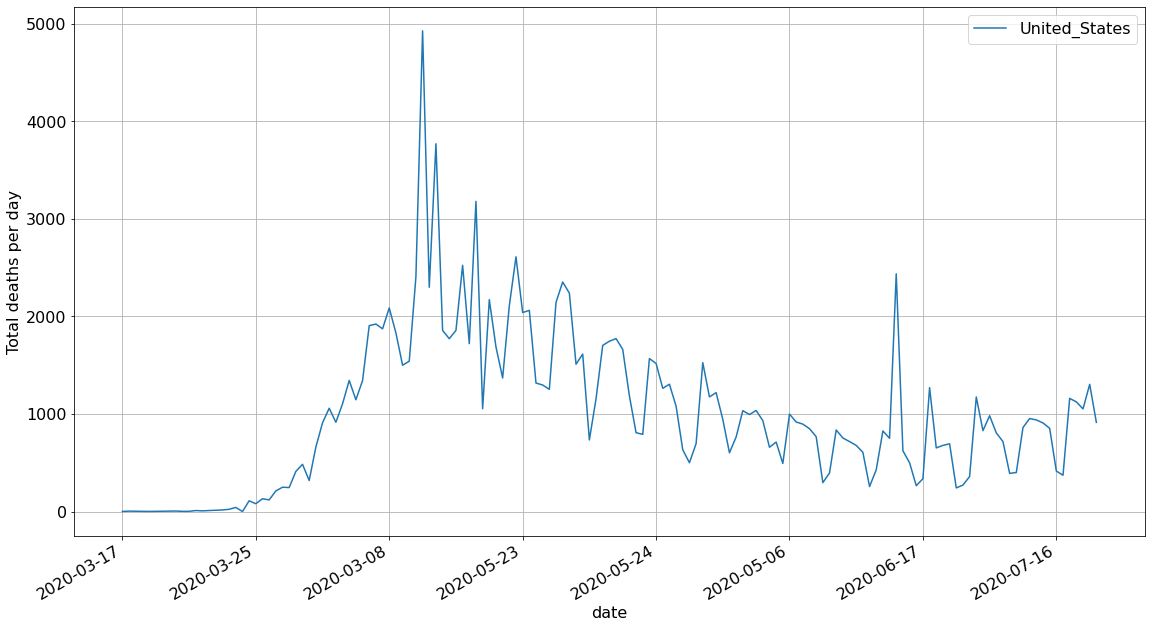

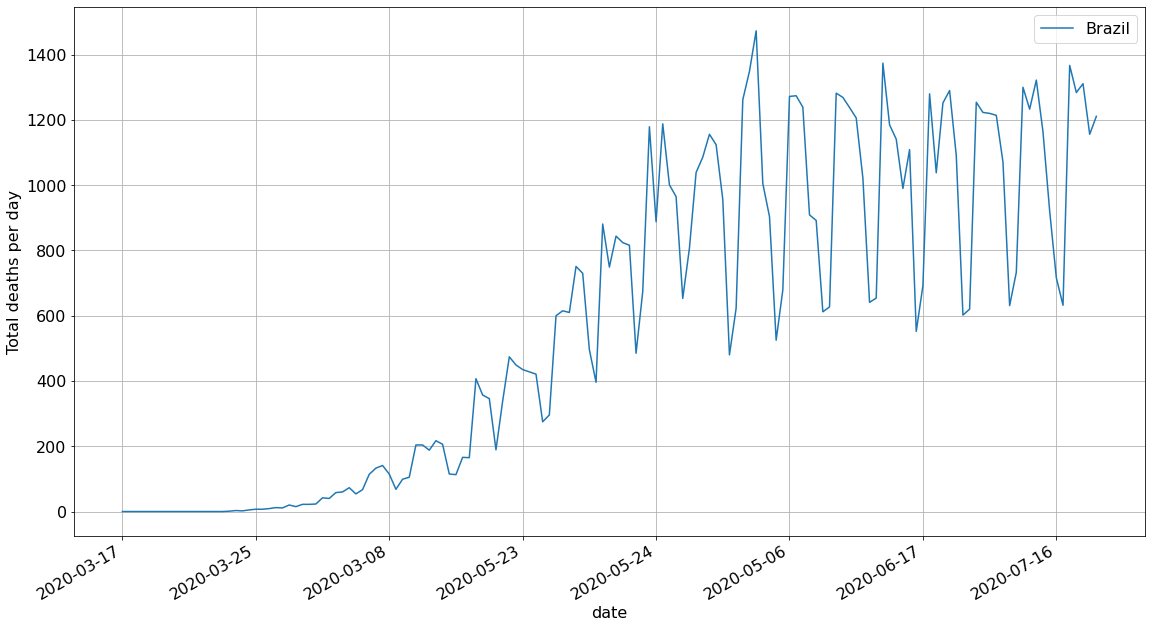

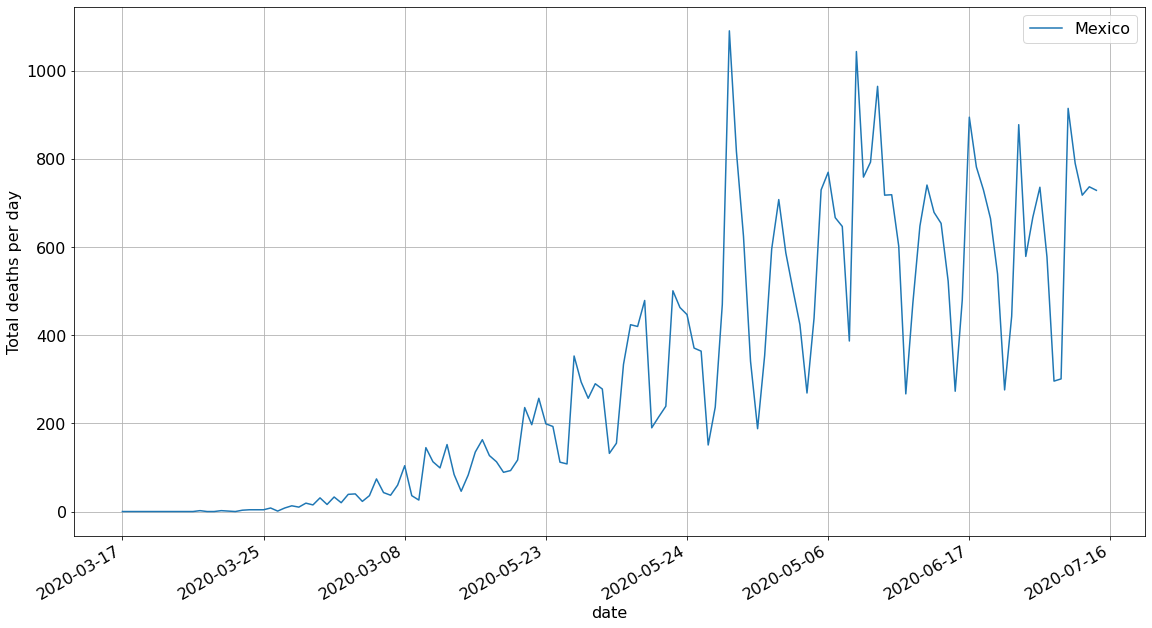

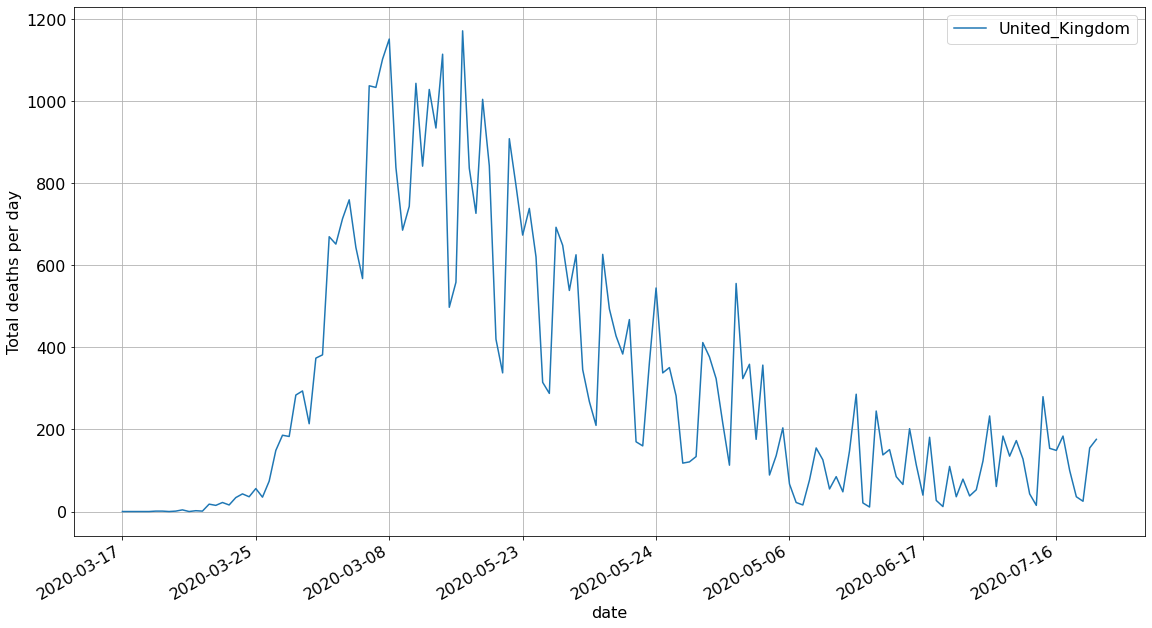

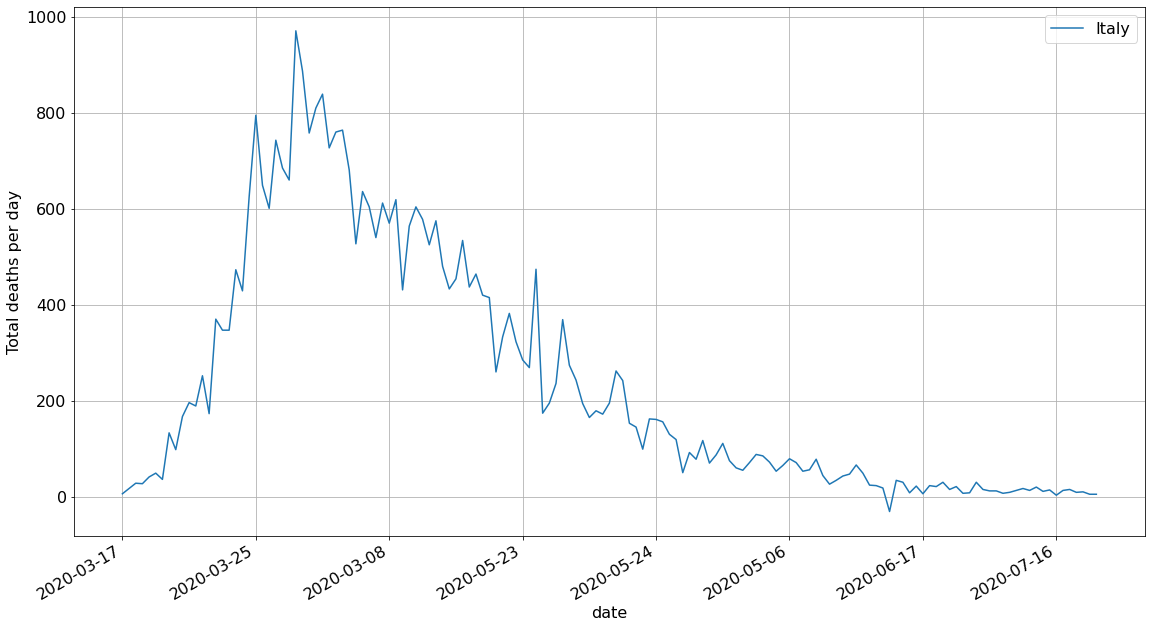

In [23]:
for index in range(len(dfCountry)):
    dfConcat.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    plt.ylabel('Total deaths per day')
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [24]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02   Brazil          2.0           0.0        0.0         0.0
1   2020-03-03   Brazil          2.0           0.0        0.0         0.0
2   2020-03-04   Brazil          2.0           0.0        0.0         0.0
3   2020-03-05   Brazil          3.0           0.0        1.0         0.0
4   2020-03-06   Brazil          8.0           0.0        5.0         0.0
..         ...      ...          ...           ...        ...         ...
142 2020-07-22   Brazil    2159654.0       81487.0    41008.0      1367.0
143 2020-07-23   Brazil    2227514.0       82771.0    67860.0      1284.0
144 2020-07-24   Brazil    2287475.0       84082.0    59961.0      1311.0
145 2020-07-25   Brazil    2343366.0       85238.0    55891.0      1156.0
146 2020-07-26   Brazil    2394513.0       86449.0    51147.0      1211.0

[147 rows x 6 columns]

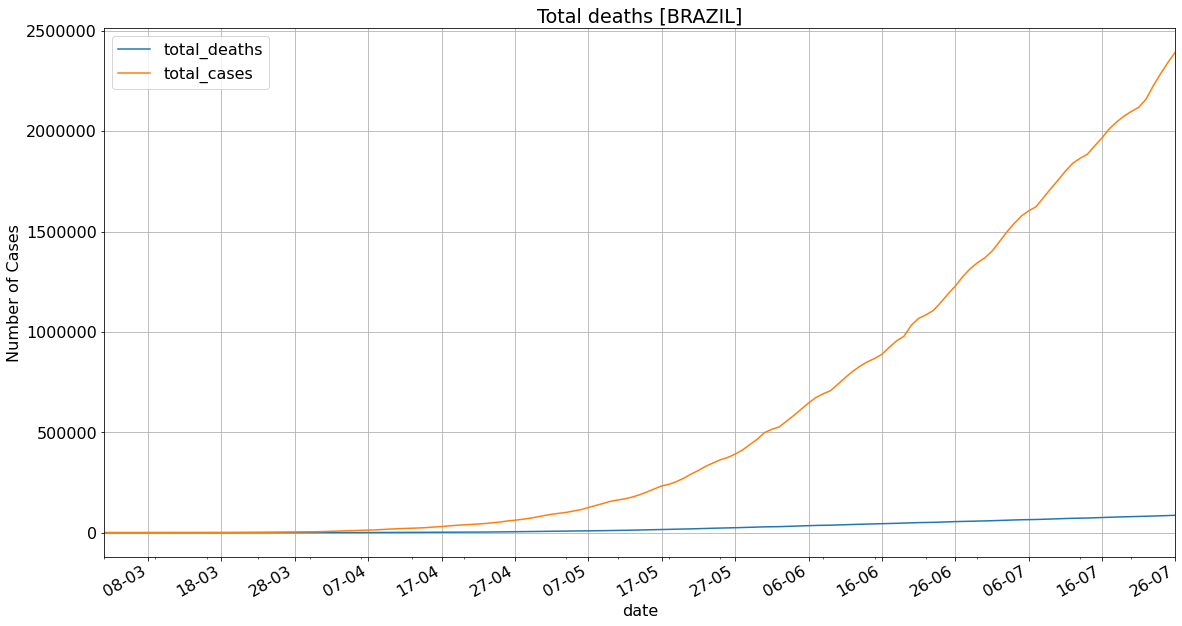

In [25]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

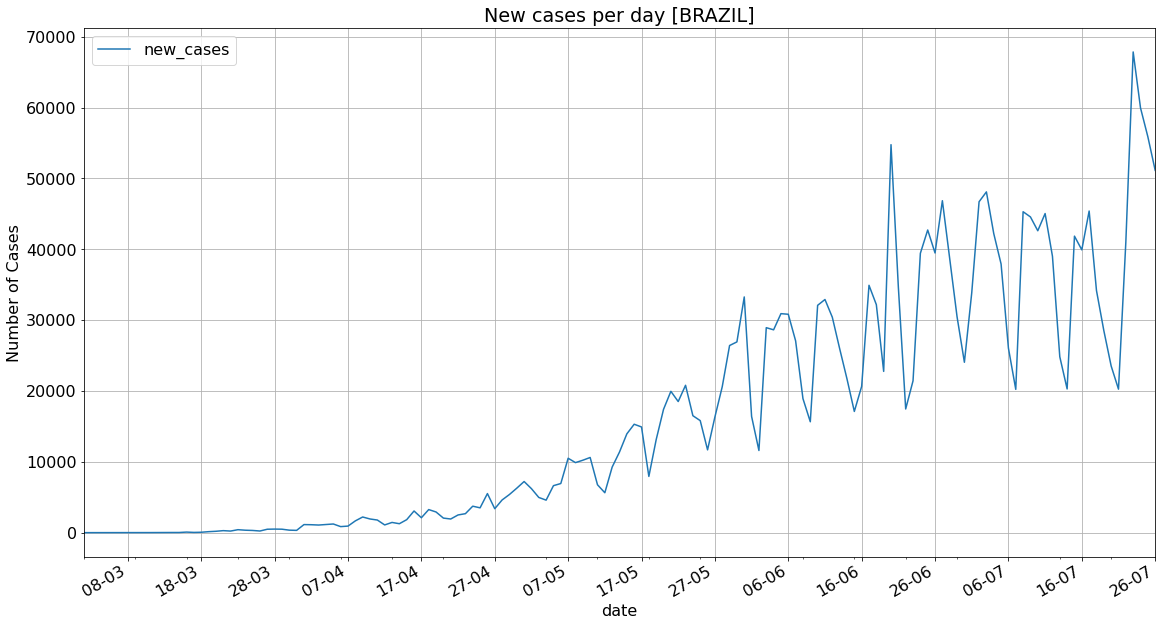

In [26]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

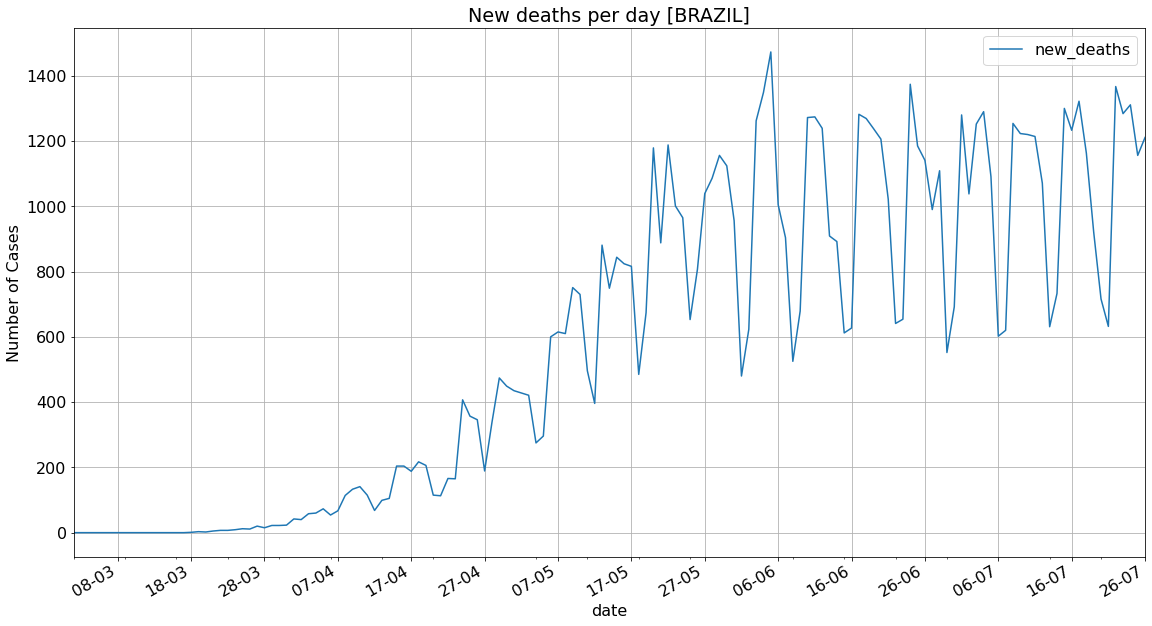

In [27]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [28]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0     2020-3-9       228.0
1    2020-3-10       208.0
2    2020-3-11       273.0
3    2020-3-12       326.0
4    2020-3-13       350.0
..         ...         ...
135  2020-7-22      6220.0
136  2020-7-23      6966.0
137  2020-7-24      9836.0
138  2020-7-25      6149.0
139  2020-7-26      5557.0

[140 rows x 2 columns]

In [29]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [31]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

105 35


In [32]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [33]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [34]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 2s 138ms/step - loss: 0.1887 - mse: 0.1887 - val_loss: 0.2243 - val_mse: 0.2243
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.1639 - val_mse: 0.1639
Epoch 3/50
11/11 [==============================] - 0s 18ms/step - loss: 0.1007 - mse: 0.1007 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 4/50
11/11 [==============================] - 0s 27ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0222 - 

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [BRAZIL]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### USELESS

In [ ]:
#figLocation = go.Figure()
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_States, name='United States'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Brazil, name='Brazil'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Mexico, name='Mexico'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_Kingdom, name='United_Kingdom'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Italy, name='Italy'))

#figLocation.update_traces(mode="markers+lines")
#figLocation.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

#figLocation.show()

In [ ]:
#dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))
#plt.title('Total Cases and Deaths [WORLD]')
#plt.ylabel('Number of Cases')
#plt.xticks(rotation=45)
#plt.grid()

In [ ]:
#dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))
#plt.title('New Deaths [WORLD]')
#plt.ylabel('Number of Cases')
#plt.xticks(rotation=45)
#plt.grid()

In [ ]:
#fig_1 = go.Figure(data=go.Scatter(x=dfBrazil.date, y=dfBrazil.new_deaths, mode='lines+markers'))
#fig_1.update_layout(title='New Deaths [BRAZIL]', yaxis_title='Number of new deaths', 
#                    xaxis_title='Date',xaxis_tickangle=315)
#fig_1.show()

In [ ]:
#dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))
#plt.title('Brazil Cases')
#plt.ylabel('Number of Cases')
#plt.grid()

In [ ]:
#train_size = int(len(dfBrazil)*0.6)
#test_train = len(dfBrazil) - train_size
#train = dfBrazil.iloc[0:train_size]
#test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [ ]:
#mean_train_x = np.mean(train, axis = 0)
#std_train_x = np.std(train.astype(np.float64), axis = 0)
#train = (train - mean_train_x)/std_train_x

In [ ]:
#mean_test_x = np.mean(test, axis = 0)
#std_test_x = np.std(test.astype(np.float64), axis = 0)
#test = (test - mean_test_x)/std_test_x

### ANTIGO LSTM

In [ ]:
# dfBrazil = dfBrazil.loc[:,['new_deaths']]
# dfBrazil = dfBrazil[
#         (dfBrazil['new_deaths'] != 0)
# ]
# dfBrazil.reset_index(drop=True, inplace=True)

In [ ]:
# train_size = int(len(dfBrazil)*0.6)
# test_train = len(dfBrazil) - train_size
# train = dfBrazil.iloc[0:train_size]
# test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [ ]:
# train = scaler.fit_transform(train)
# train = pd.DataFrame(train)
# train.columns = ['new_deaths']

In [ ]:
# test = scaler.fit_transform(test)
# test = pd.DataFrame(test)
# test.columns = ['new_deaths']

In [ ]:
# def create_dataset(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X.iloc[i:(i + time_steps)].values
#         Xs.append(v)        
#         ys.append(y.iloc[i + time_steps])
#     return np.array(Xs), np.array(ys)

In [ ]:
# time_steps = 1
# X_train, y_train = create_dataset(train, train.new_deaths, time_steps)
# X_test, y_test = create_dataset(test, test.new_deaths, time_steps)

In [ ]:
# model = keras.Sequential()
# model.add(keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.Dense(1))
# model.compile(loss='mse',optimizer="adam",metrics=['mse'])

In [ ]:
# history = model.fit(
#     X_train, y_train, 
#     epochs=100, 
#     batch_size=1, 
#     validation_split=0.01, 
#     verbose=1, 
#     shuffle=False
# )

In [ ]:
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend();

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# fig = plt.figure(figsize=(19.20,10.80),dpi=100)
# plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
# plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
# plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
# plt.ylabel('Value')
# plt.xlabel('Time Step')
# plt.legend()
# plt.show();